[[6.123234e-17]]
[[ 0.5  0.5]
 [-0.5 -0.5]]
[[-1.82050037  2.72610319]
 [-0.55873442 -0.46918372]]
[[-0.09139858  0.87327583]
 [-0.42664442 -0.5470986 ]]
[[-0.00226068  0.85316944]
 [-0.36337891 -0.73739846]]
[[ 0.22346823  0.69825996]
 [-0.36893416 -0.76022695]]
[[ 0.21935657  0.76427519]
 [-0.28955942 -1.03136351]]
[[ 0.22139452  0.75658196]
 [-0.29611192 -1.00620346]]
[[ 0.22133444  0.757554  ]
 [-0.29513317 -1.00996841]]
[[ 0.22134367  0.75756679]
 [-0.29511346 -1.01004652]]
[[ 8.66025404e-01  5.77350269e-01 -2.88675135e-01]
 [-1.15470054e+00  3.52716092e-16  1.15470054e+00]
 [ 2.88675135e-01 -5.77350269e-01 -8.66025404e-01]]
[[-5.18681696  5.69875895 -0.7722683 ]
 [-3.00811359  2.5064303   0.74822396]
 [ 0.70377745 -1.29176885 -0.65820512]]
[[-0.5239596   1.37890277 -0.63125291]
 [-0.97019851  0.07209023  1.17997126]
 [ 0.23625785 -0.62766414 -0.84433028]]
[[ 0.21131098  0.88209508 -0.4306829 ]
 [-1.02184171  0.01179419  1.17386397]
 [ 0.25242013 -0.59390354 -0.85924319]]
[[ 0.401

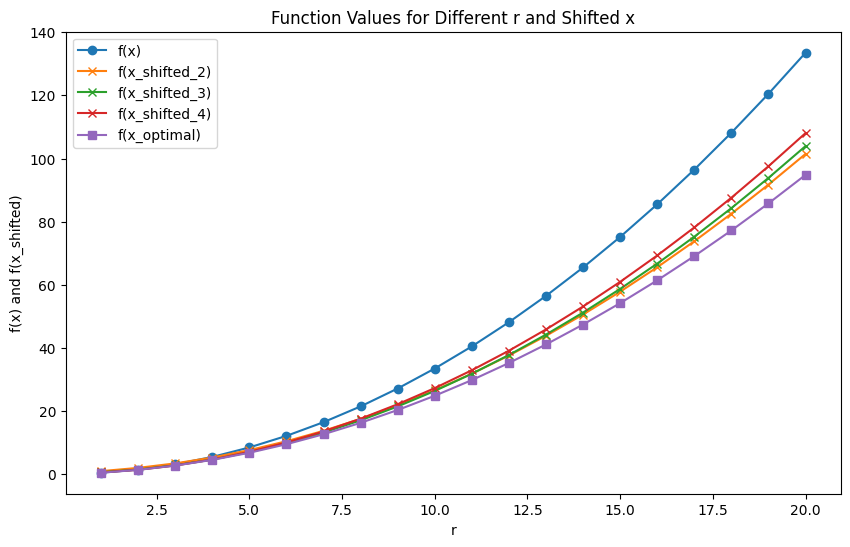

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import minimize

# 一阶导数的情况
d = 1

# 定义 f(x, Omegas) 函数
# p for odd order d
def f(x, Omegas):
    p = Omegas ** d * (-1 if d % 4 == 3 else 1)
    A = np.sin(np.outer(x, Omegas))
    return 0.5 * np.trace(inv(A.T @ A) @ np.outer(p, p))

# 定义解析梯度函数
def analytical_gradient(x, Omegas):
    p = Omegas ** d * (-1 if d % 4 == 3 else 1)
    A = np.sin(np.outer(x, Omegas))
    A_1 = np.cos(np.outer(x, Omegas)) * Omegas
    A_inv = np.linalg.inv(A)
    print(A_1 @ A_inv)
    b = np.linalg.inv(A.T) @ p
    grad = -np.diag(A_1 @ A_inv @ np.outer(b, b))
    return grad

# 生成标准等距x的函数
def generate_x(r):
    return np.array([(2 * mu - 1) / (2 * r) * np.pi for mu in range(1, r + 1)])

# 生成平移后的x的函数
def generate_x_shifted_n(r, n):
    x = generate_x(r)
    return x + np.pi / (2 * r) * (1 / n)

# 计算函数值的通用模块
def calculate_function_values(r, Omegas, shift_n=None, optimize=False):
    if shift_n is None:
        x = generate_x(r)
    else:
        x = generate_x_shifted_n(r, shift_n)
    
    if optimize:
        result = minimize(lambda x: f(x, Omegas), x, jac=lambda x: analytical_gradient(x, Omegas), method='BFGS')
        return result.fun
    else:
        return f(x, Omegas)

# 计算任意 shift_n 的函数值
def calculate_shifted_values(r_values, Omegas_list, n_list):
    f_x_values = []
    f_x_shifted_values = {n: [] for n in n_list}
    optimal_values = []
    # all_table = []

    for r, Omegas in zip(r_values, Omegas_list):
        # 计算标准等距x时的方差值 f(x)
        f_x_values.append(f(generate_x(r), Omegas))

        # 计算不同 1/n 倍的平移后的方差值 f(x)
        for n in n_list:
            f_x_shifted_values[n].append(calculate_function_values(r, Omegas, shift_n=n))
        
        # 计算方差值
        optimal_values.append(calculate_function_values(r, Omegas, optimize=True))
    
    return f_x_values, f_x_shifted_values, optimal_values

# 设置 r 和 n 的范围
r_values = np.arange(1, 21)  # Example range of r values
Omegas_list = [np.arange(1, r + 1) for r in r_values]  # 对每个 r 生成 Omegas

n_list = range(2,5)  # 你可以添加更多的 n 值
# n_list = np.arange(2,3,0.2)

# 计算函数值
f_x_values, f_x_shifted_values, optimal_values = calculate_shifted_values(r_values, Omegas_list, n_list)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(r_values, f_x_values, label='f(x)', marker='o')
for n in n_list:
    plt.plot(r_values, f_x_shifted_values[n], label=f'f(x_shifted_{n})', marker='x')
plt.plot(r_values, optimal_values, label='f(x_optimal)', marker='s')
plt.xlabel('r')
plt.ylabel('f(x) and f(x_shifted)')
plt.title('Function Values for Different r and Shifted x')
plt.legend()
# plt.grid(True)
plt.show()


In [2]:
f_x_shifted_values

{2: [0.9999999999999998,
  2.032249129798594,
  3.4509977566905867,
  5.317010342639616,
  7.65206359449774,
  10.46625410383026,
  13.765059659416728,
  17.551778167661023,
  21.828547226960104,
  26.596830749405758,
  31.85767492334802,
  37.61185324441939,
  43.85995366681319,
  50.60243352989308,
  57.839655567666455,
  65.57191231274301,
  73.79944311006432,
  82.52244627193907,
  91.74108794909574,
  101.45550872767701]}

In [3]:
f_x_values

[0.5,
 1.5,
 3.166666666666667,
 5.5,
 8.5,
 12.166666666666668,
 16.5,
 21.5,
 27.16666666666667,
 33.50000000000001,
 40.5,
 48.166666666666664,
 56.5,
 65.5,
 75.16666666666669,
 85.50000000000001,
 96.50000000000001,
 108.16666666666667,
 120.5,
 133.5]

In [4]:
optimal_values

[0.5,
 1.4033194536791047,
 2.756803168908413,
 4.561813723439554,
 6.81819980349541,
 9.525914724347054,
 12.684940895136352,
 16.29527049037076,
 20.356899596811317,
 24.8698260801696,
 29.834048695631125,
 35.2495666772721,
 41.1163795327799,
 47.434486933984964,
 54.20388865529407,
 61.42458453747848,
 69.09657446554763,
 77.21985835477795,
 85.79443614162959,
 94.82030777769353]

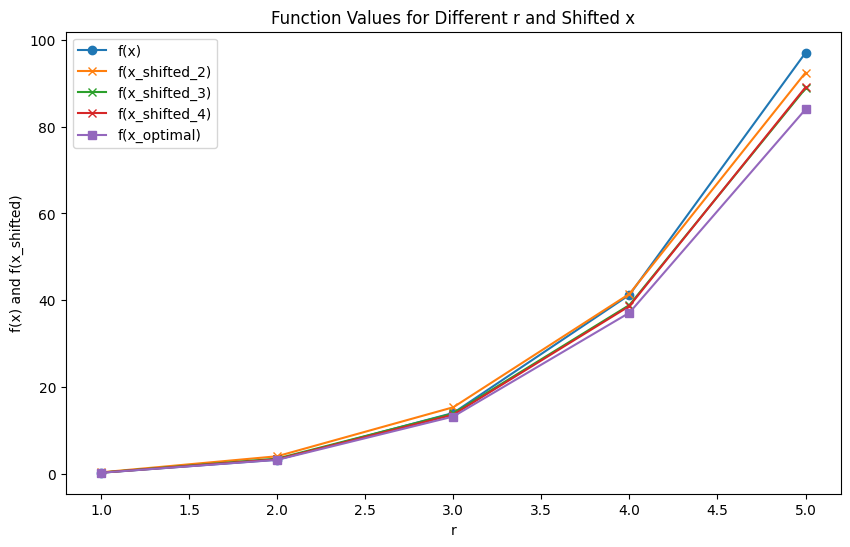

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import minimize

# 二阶导数的情况
d = 2

# 定义 f(x, Omegas) 函数
# q for even order d
def f(x, Omegas):
    q = Omegas ** d * (-1 if d % 4 == 2 else 1)
    q = np.insert(q, 0, 1 if d == 0 else 0)
    Omegas = np.insert(Omegas, 0, 0)
    A = np.cos(np.outer(x, Omegas))
    return 0.5 * np.trace(inv(A.T @ A) @ np.outer(q, q))

# 定义解析梯度函数
def analytical_gradient(x, Omegas):
    q = Omegas ** d * (-1 if d % 4 == 2 else 1)
    q = np.insert(q, 0, 1 if d == 0 else 0)
    Omegas = np.insert(Omegas, 0, 0)
    A = np.cos(np.outer(x, Omegas))
    A_1 = -np.sin(np.outer(x, Omegas)) * Omegas
    A_inv = np.linalg.inv(A)
    b = np.linalg.inv(A.T) @ q
    grad = -np.diag(A_1 @ A_inv @ np.outer(b, b))
    return grad

# 生成标准等距x的函数
def generate_x(r):
    return np.array([ mu * (np.pi / r)  for mu in range(0, r + 1)])

# 生成平移后的x的函数
def generate_x_shifted_n(r, n):
    x = generate_x(r)
    return x + np.pi / (3 * r) * (1 / n) # 这个间距不要改动为好

# 计算函数值的通用模块
def calculate_function_values(r, Omegas, shift_n=None, optimize=False):
    if shift_n is None:
        x = generate_x(r)
    else:
        x = generate_x_shifted_n(r, shift_n)
    
    if optimize:
        result = minimize(lambda x: f(x, Omegas), x, jac=lambda x: analytical_gradient(x, Omegas), method='BFGS')
        return result.fun
    else:
        return f(x, Omegas)

# 计算任意 shift_n 的函数值
def calculate_shifted_values(r_values, Omegas_list, n_list):
    f_x_values = []
    f_x_shifted_values = {n: [] for n in n_list}
    optimal_values = []
    # all_table = []

    for r, Omegas in zip(r_values, Omegas_list):
        # 计算标准等距x时的方差值 f(x)
        f_x_values.append(f(generate_x(r), Omegas))

        # 计算不同 1/n 倍的平移后的方差值 f(x)
        for n in n_list:
            f_x_shifted_values[n].append(calculate_function_values(r, Omegas, shift_n=n))
        
        # 计算方差值
        optimal_values.append(calculate_function_values(r, Omegas, optimize=True))
    
    return f_x_values, f_x_shifted_values, optimal_values

# 设置 r 和 n 的范围
r_values = np.arange(1, 6)  # Example range of r values
Omegas_list = [np.arange(1, r + 1) for r in r_values]  # 对每个 r 生成 Omegas

n_list = range(2,5)  # 你可以添加更多的 n 值
# n_list = []

# 计算函数值
f_x_values, f_x_shifted_values, optimal_values = calculate_shifted_values(r_values, Omegas_list, n_list)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(r_values, f_x_values, label='f(x)', marker='o')
for n in n_list:
    plt.plot(r_values, f_x_shifted_values[n], label=f'f(x_shifted_{n})', marker='x')
plt.plot(r_values, optimal_values, label='f(x_optimal)', marker='s')
plt.xlabel('r')
plt.ylabel('f(x) and f(x_shifted)')
plt.title('Function Values for Different r and Shifted x')
plt.legend()
# plt.grid(True)
plt.show()


In [6]:
f_x_values, f_x_shifted_values, optimal_values

([0.25, 3.25, 14.02777777777778, 41.25, 97.05],
 {2: [0.33333333333333326,
   4.043362653769132,
   15.341857547815634,
   41.47044103470958,
   92.48480358456308],
  3: [0.28311858285794855,
   3.499867832729205,
   13.907183540879963,
   38.905749961162954,
   88.83587075689886],
  4: [0.2679491924311227,
   3.3508273995783067,
   13.617400768769816,
   38.662320295592956,
   89.10909096886027]},
 [0.25,
  3.2142077374342515,
  13.204694354469678,
  37.124685885908804,
  84.01785843230181])

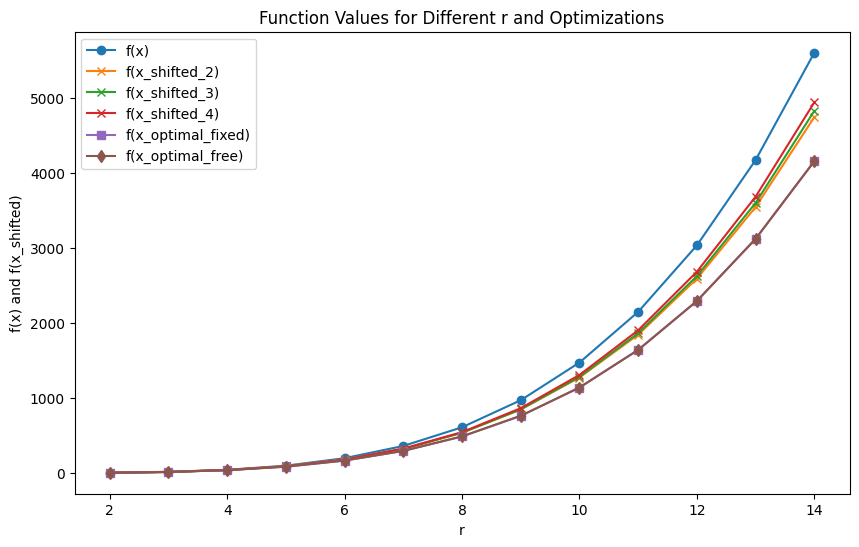

In [7]:
# 添加了固定首位两个端点的优化任务

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import minimize

# 二阶导数的情况
d = 2

# 定义 f(x, Omegas) 函数
# q for even order d
def f(x, Omegas):
    q = Omegas ** d * (-1 if d % 4 == 2 else 1)
    q = np.insert(q, 0, 1 if d == 0 else 0)
    Omegas = np.insert(Omegas, 0, 0)
    A = np.cos(np.outer(x, Omegas))
    return 0.5 * np.trace(inv(A.T @ A) @ np.outer(q, q))

# 定义解析梯度函数
def analytical_gradient(x, Omegas):
    q = Omegas ** d * (-1 if d % 4 == 2 else 1)
    q = np.insert(q, 0, 1 if d == 0 else 0)
    Omegas = np.insert(Omegas, 0, 0)
    A = np.cos(np.outer(x, Omegas))
    A_1 = -np.sin(np.outer(x, Omegas)) * Omegas
    A_inv = np.linalg.inv(A)
    b = np.linalg.inv(A.T) @ q
    grad = -np.diag(A_1 @ A_inv @ np.outer(b, b))
    return grad

# 生成标准等距x的函数
def generate_x(r):
    return np.array([ mu * (np.pi / r)  for mu in range(0, r + 1)])

# 生成平移后的x的函数
def generate_x_shifted_n(r, n):
    x = generate_x(r)
    return x + np.pi / (3 * r) * (1 / n) # 这个间距不要改动为好

# 定义新的目标函数，将第一个元素固定为0，最后一个固定为pi
def fixed_endpoints_f(x_inner, Omegas):
    # 将 x[0] 设为 0，x[-1] 设为 pi
    x_full = np.concatenate(([0], x_inner, [np.pi]))
    return f(x_full, Omegas)

# 定义新的解析梯度函数，将第一个元素固定为0，最后一个固定为pi
def fixed_endpoints_gradient(x_inner, Omegas):
    x_full = np.concatenate(([0], x_inner, [np.pi]))
    return analytical_gradient(x_full, Omegas)[1:-1]  # 返回中间部分的梯度

# 全x可动的目标函数
def free_endpoints_f(x, Omegas):
    return f(x, Omegas)

# 全x可动的梯度函数
def free_endpoints_gradient(x, Omegas):
    return analytical_gradient(x, Omegas)

# 修改后的优化计算模块
def calculate_function_values(r, Omegas, shift_n=None, optimize=False, free_x=False):
    if shift_n is None:
        x = generate_x(r)
    else:
        x = generate_x_shifted_n(r, shift_n)
    
    if optimize:
        if free_x:
            # 全 x 可变动的优化
            result = minimize(lambda x: free_endpoints_f(x, Omegas),
                              x,
                              jac=lambda x: free_endpoints_gradient(x, Omegas),
                              method='BFGS')
            return f(result.x, Omegas)
        else:
            # 只优化 x[1:-1]，固定 x[0] 和 x[-1]
            x_inner = x[1:-1]  # 优化部分
            x_inner = np.random.uniform(0, np.pi, size=len(x_inner))  # 随机初始化
            result = minimize(lambda x_inner: fixed_endpoints_f(x_inner, Omegas),
                              x_inner,
                              jac=lambda x_inner: fixed_endpoints_gradient(x_inner, Omegas),
                              method='BFGS')
            # 将优化的结果补回固定端点
            x_optimal = np.concatenate(([0], result.x, [np.pi]))
            return f(x_optimal, Omegas)
    else:
        return f(x, Omegas)

# 计算任意 shift_n 的函数值
def calculate_shifted_values(r_values, Omegas_list, n_list):
    f_x_values = []
    f_x_shifted_values = {n: [] for n in n_list}
    optimal_fixed_values = []
    optimal_free_values = []

    for r, Omegas in zip(r_values, Omegas_list):
        # 计算标准等距x时的方差值 f(x)
        f_x_values.append(f(generate_x(r), Omegas))

        # 计算不同 1/n 倍的平移后的方差值 f(x)
        for n in n_list:
            f_x_shifted_values[n].append(calculate_function_values(r, Omegas, shift_n=n))
        
        # 计算首尾固定的优化方差值
        optimal_fixed_values.append(calculate_function_values(r, Omegas, optimize=True, free_x=False))

        # 计算全 x 可动的优化方差值
        optimal_free_values.append(calculate_function_values(r, Omegas, optimize=True, free_x=True))
    
    return f_x_values, f_x_shifted_values, optimal_fixed_values, optimal_free_values

# 设置 r 和 n 的范围
# r 必须大于等于 2 
r_values = np.arange(2, 15)  # Example range of r values
Omegas_list = [np.arange(1, r + 1) for r in r_values]  # 对每个 r 生成 Omegas

n_list = range(2, 5)  # 你可以添加更多的 n 值
# n_list = []

# 计算函数值
f_x_values, f_x_shifted_values, optimal_fixed_values, optimal_free_values = calculate_shifted_values(r_values, Omegas_list, n_list)

# 绘制结果
plt.figure(figsize=(10, 6))

# 标准 f(x)
plt.plot(r_values, f_x_values, label='f(x)', marker='o')

# 平移后的 f(x)
for n in n_list:
    plt.plot(r_values, f_x_shifted_values[n], label=f'f(x_shifted_{n})', marker='x')

# 优化结果：首尾固定
plt.plot(r_values, optimal_fixed_values, label='f(x_optimal_fixed)', marker='s')

# 优化结果：全x可动
plt.plot(r_values, optimal_free_values, label='f(x_optimal_free)', marker='d')

plt.xlabel('r')
plt.ylabel('f(x) and f(x_shifted)')
plt.title('Function Values for Different r and Optimizations')
plt.legend()
plt.show()


### 我们发现，即使是首尾固定的优化，其结果也等于x整体自由优化后的方差值。这表明在优化过程中，固定端点对结果没有显著影响。所以可以固定shou尾点，只优化中间部分。以减少 f calling次数。

In [8]:
f_x_values, f_x_shifted_values, optimal_fixed_values, optimal_free_values

([3.25,
  14.02777777777778,
  41.25,
  97.05,
  197.02777777777786,
  360.25000000000006,
  609.25,
  970.027777777778,
  1472.0500000000002,
  2148.2500000000005,
  3035.027777777779,
  4172.250000000002,
  5603.25],
 {2: [4.043362653769132,
   15.341857547815634,
   41.47044103470958,
   92.48480358456308,
   181.29070493171253,
   323.6517051092512,
   538.1919357873032,
   846.3973711309302,
   1272.616505059281,
   1844.0607505488765,
   2590.8046927420964,
   3545.786258357569,
   4744.806833989468],
  3: [3.499867832729205,
   13.907183540879963,
   38.905749961162954,
   88.83587075689886,
   176.98969280313275,
   319.6128113582123,
   535.9045877284734,
   848.0182184066841,
   1281.06074570694,
   1863.0930540122354,
   2625.1298632181815,
   3601.139722481853,
   4828.045004981574],
  4: [3.3508273995783067,
   13.617400768769816,
   38.662320295592956,
   89.10909096886027,
   178.61645459447283,
   323.8789094154719,
   544.6267004350746,
   863.6257624557904,
   1306.67